# Pymaceuticals Inc.
---

### Analysis

- Extremely high correlation between mouse weight and tumor volume with the following Correlation Coefficient: 0.9505243961855268. We can conclude that the more the mouse, weighs, the more severe a tumor is likely to be. 
- The most effective medicine was Ramicane with a mean tumor volume of	40.216745, the lowest of all the medicines.
- The two most effective drugs were Ramicane and Capomulin, both of these drugs had significantly higher Timepoints than the rest of the medicines. This appears to be a direct cause/effect relationship between drug effectiveness and timepoint. 
- ccording to the line graph, Capomulin was extremely effective at lowering the tumor volume for the fitst 25 days, then it gets higher slowly. 
 

In [1]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.


In [60]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "/Users/willsmalley/Desktop/Mouse_metadata.csv"
study_results_path = "/Users/willsmalley/Desktop/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_path = pd.read_csv(mouse_metadata_path)
study_results_path = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata_path,study_results_path)

# Display the data table for preview
combined_data.head(225)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
220,w914,Capomulin,Male,24,21,25,40.291917,0
221,w914,Capomulin,Male,24,21,30,40.993110,0
222,w914,Capomulin,Male,24,21,35,41.664916,1
223,w914,Capomulin,Male,24,21,40,35.611309,2


In [33]:
# Checking the number of mice.
mouse_count = combined_data["Mouse ID"].nunique()
mouse_count

249

In [34]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID","Timepoint"],keep=False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [35]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
xtra_mice = duplicate_mice["Mouse ID"].unique()
xtra_mice
                                        

array(['g989'], dtype=object)

In [36]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data["Mouse ID"] !="g989"]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [37]:
# Checking the number of mice in the clean DataFrame.
mouse_count2 = clean_data["Mouse ID"].nunique()
mouse_count2

248

## Summary Statistics

In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = combined_data.groupby('Drug Regimen').agg(
    Mean_Tumor_Volume=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='mean'),
    Median_Tumor_Volume=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='median'),
    Tumor_Volume_Variance=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='var'),
    Tumor_Volume_Std_Dev=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='std'),
    Tumor_Volume_Std_Err=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='sem')
)

# Reset the index to make 'Drug Regimen' a regular column
summary_stats 


,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_Std_Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [39]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_stats = combined_data.groupby('Drug Regimen').agg(
    Mean=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='mean'),
    Median=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='median'),
    Variance=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='var'),
    Std_Dev=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='std'),
    Std_Err=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='sem')
)

aggregate_stats

,Mean,Median,Variance,Std_Dev,Std_Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

[]

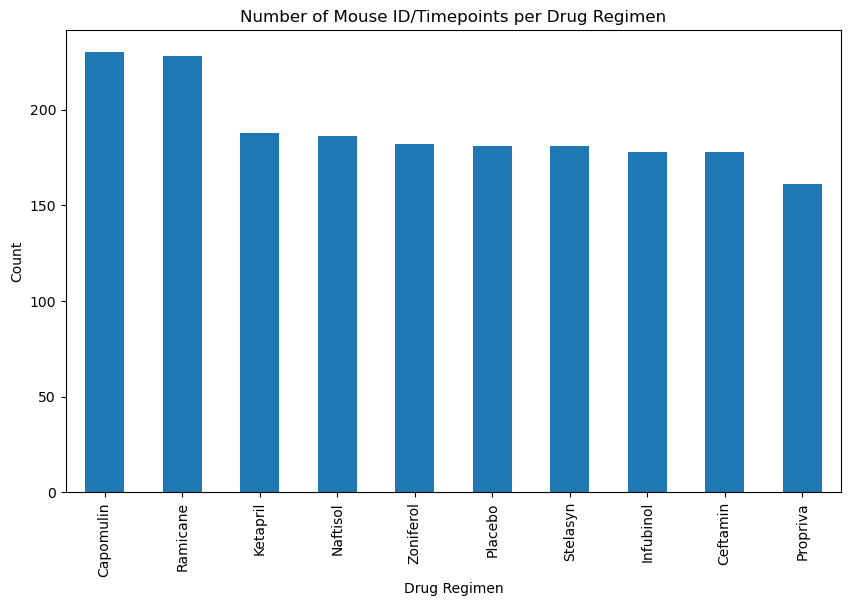

In [40]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = combined_data['Drug Regimen'].value_counts()


regimen_counts.plot(kind='bar', figsize=(10, 6))

plt.title('Number of Mouse ID/Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Count')

plt.plot()

In [41]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


<function matplotlib.pyplot.show(close=None, block=None)>

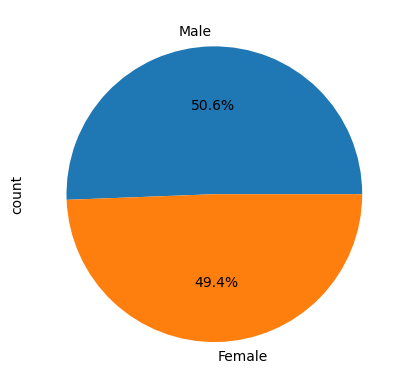

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data = combined_data["Sex"]
sex_count = sex_data.value_counts()
sex_count.plot.pie(autopct='%1.1f%%')
plt.show

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

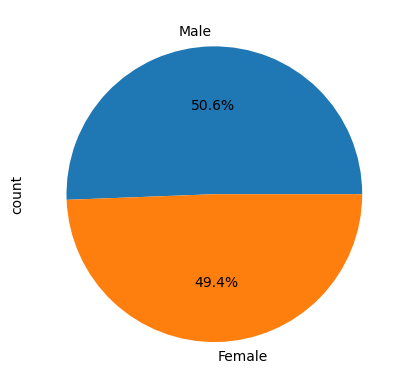

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_data = combined_data["Sex"]
sex_count = sex_data.value_counts()
sex_count.plot(kind='pie', autopct='%1.1f%%',)
plt.plot

## Quartiles, Outliers and Boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume = last_timepoint.merge(clean_data, on=["Mouse ID","Timepoint"], how='left')


In [45]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    tumor_volume_subset = tumor_volume.loc[tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_volume_data.append(tumor_volume_subset)

    # Calculate quartiles and IQR
    quartiles = tumor_volume_subset.quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)

    print(f"Treatment: {treatment}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")

    # Determine and print potential outliers using upper and lower bounds
    outliers = tumor_volume_subset[(tumor_volume_subset < lower_bound) | (tumor_volume_subset > upper_bound)]
    print(f"Potential Outliers: {outliers}")
    print("\n")

Treatment: Capomulin
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Treatment: Ramicane
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Treatment: Infubinol
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


Treatment: Ceftamin
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)




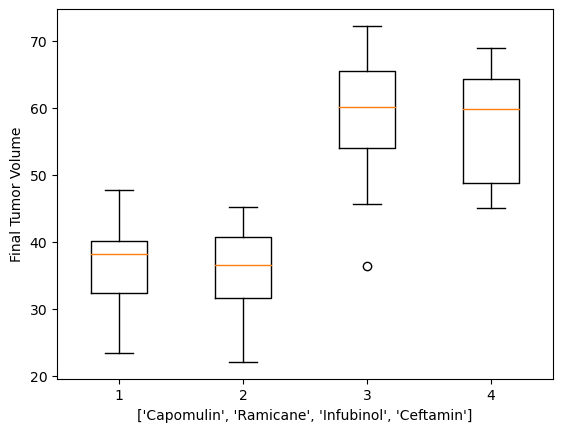

In [46]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume')
ax1.set_xlabel(treatments)
ax1.boxplot(tumor_volume_data)
boxplot_colors = {###NOT SURE WHY THE COLORING DIDNT WORK
    'boxes': 'Green',
    'whiskers': 'blue',
    'fliers': 'red',
    'medians': 'orange',
    'caps': 'purple'
}
plt.show()

## Line and Scatter Plots

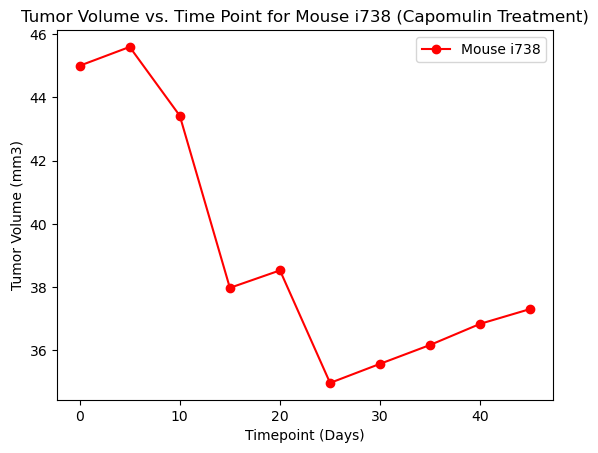

In [59]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "i738"
line_plot_data = clean_data[(clean_data['Drug Regimen'] == 'Capomulin') & (clean_data['Mouse ID'] == mouse_id)]


plt.plot(line_plot_data['Timepoint'], line_plot_data['Tumor Volume (mm3)'], marker='o', color='r', linestyle='-', label=f'Mouse {mouse_id}')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
                        
                        
                  
                        


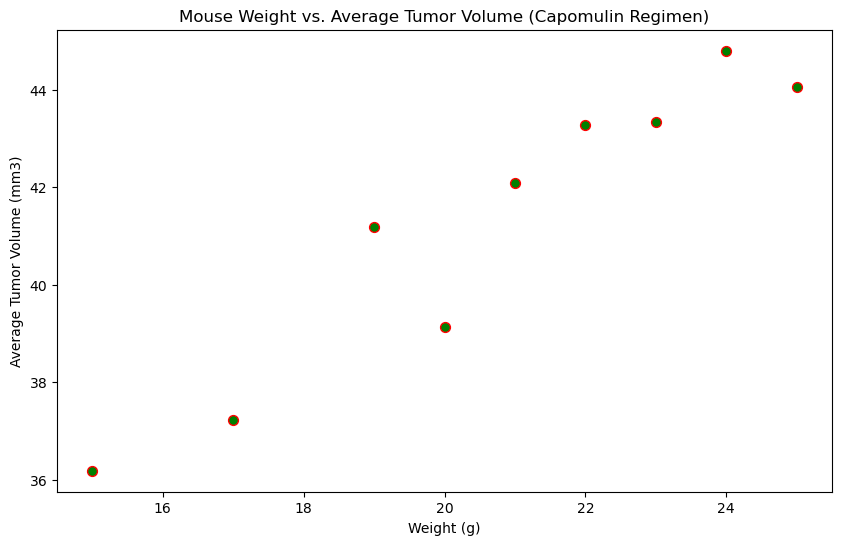

In [68]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
average_tumor = capomulin_data.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()

x_axis = average_tumor['Weight (g)']
y_axis = average_tumor['Tumor Volume (mm3)']

plt.figure(figsize=(10, 6))
plt.scatter(x_axis, y_axis, marker='o', color='green', edgecolors='red', s=50)
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(False)

# Show the scatter plot
plt.show()
                                                                                      
                                



              

## Correlation and Regression

Correlation Coefficient: 0.9505243961855268


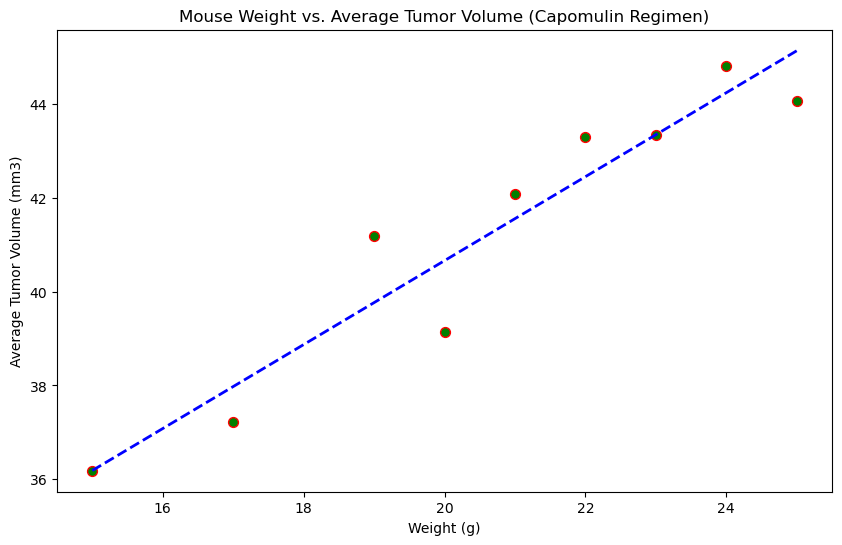

In [73]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
average_tumor = capomulin_data.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()

x_axis = average_tumor['Weight (g)']
y_axis = average_tumor['Tumor Volume (mm3)']

plt.figure(figsize=(10, 6))
plt.scatter(x_axis, y_axis, marker='o', color='green', edgecolors='red', s=50)
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(False)
                                                                                






correlation_coefficient = st.pearsonr(x_axis, y_axis)
print(f'Correlation Coefficient: {correlation_coefficient[0]}')
slope, intercept, r_value, p_value, std_err = st.linregress(x_axis, y_axis)
line = slope * x_axis + intercept

# Plot the linear regression line
plt.plot(x_axis, line, color='blue', linestyle='--', linewidth=2)

# Show the scatter plot with the linear regression line
plt.show()